In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import PIL

In [10]:
# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", map_name='8x8', is_slippery=False)

#Initialize Q1 and Q2 tables with zeros
Q1 = np.zeros((env.observation_space.n, env.action_space.n))
Q2 = np.zeros((env.observation_space.n, env.action_space.n))


# Set hyperparameters
alpha = 0.9  # learning rate
gamma = 0.1  # discount factor
epsilon = 1  # exploration rate
epsilon_decay_rate = 0.0001
num_episodes = 15000

# Define rewards and negative rewards
goal_reward = 23
hole_reward = -2
other_reward = -1

In [11]:
# Function to choose action based on epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # explore
    else:
        return np.argmax(Q1[state] + Q2[state])  # exploit

# Initialize list to store cumulative rewards
cumulative_rewards = []

In [12]:
# Q-learning algorithm
for episode in range(num_episodes):
    
    if episode % 2000 == 0:
        print('episode', episode)
    
    state = env.reset()[0]
    done = False
    truncated = False
    total_reward = 0

    while not done and not truncated:
        action = choose_action(state, epsilon)
        next_state, reward, done, truncated, _ = env.step(action)

        # Update rewards
        if done and reward == 0:  # Fell into a hole
            reward = hole_reward
        elif done and reward == 1:  # Reached the goal
            reward = goal_reward
        else:
            reward = other_reward

        # Choose which Q-table to update randomly
        if np.random.rand() < 0.5:
            Q1_max = np.max(Q1[next_state])
            Q1[state, action] += alpha * (
                reward + gamma * Q2[next_state, np.argmax(Q1[next_state])] - Q1[state, action]
            )
        else:
            Q2_max = np.max(Q2[next_state])
            Q2[state, action] += alpha * (
                reward + gamma * Q1[next_state, np.argmax(Q2[next_state])] - Q2[state, action]
            )

        total_reward += reward
        state = next_state
    
    epsilon = max(0, epsilon - epsilon_decay_rate)
    
    cumulative_rewards.append(total_reward)

episode 0
episode 2000
episode 4000
episode 6000
episode 8000
episode 10000
episode 12000
episode 14000


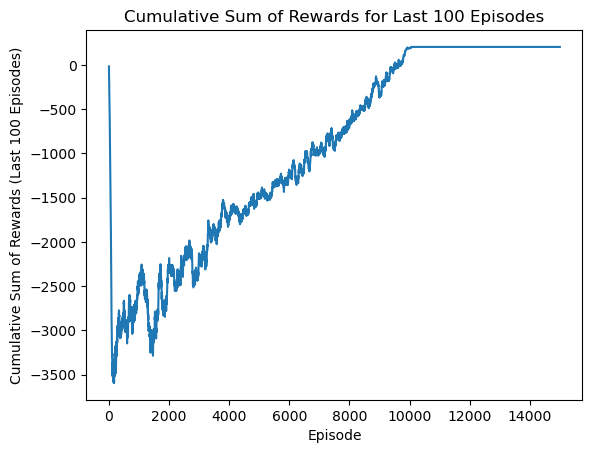

In [19]:
episodes = len(cumulative_rewards)
sum_rewards = np.zeros(episodes)

# Calculate the cumulative sum of rewards for the last 100 episodes
for t in range(episodes):
    sum_rewards[t] = np.sum(cumulative_rewards[max(0, t-100):(t+1)])

# Plot the cumulative sum of rewards for the last 100 episodes
plt.plot(sum_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Sum of Rewards (Last 100 Episodes)')
plt.title('Cumulative Sum of Rewards for Last 100 Episodes')
plt.show()

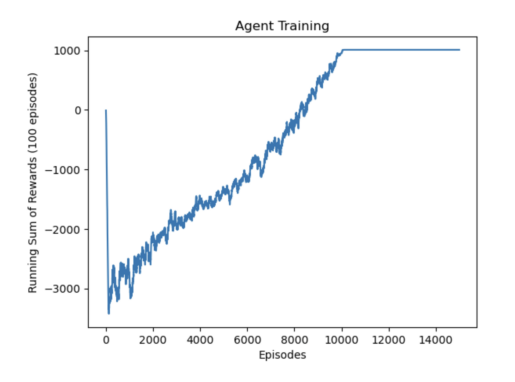

In [6]:
image = PIL.Image.open('Q-Learning.png')
plt.axis('off')
plt.imshow(image)

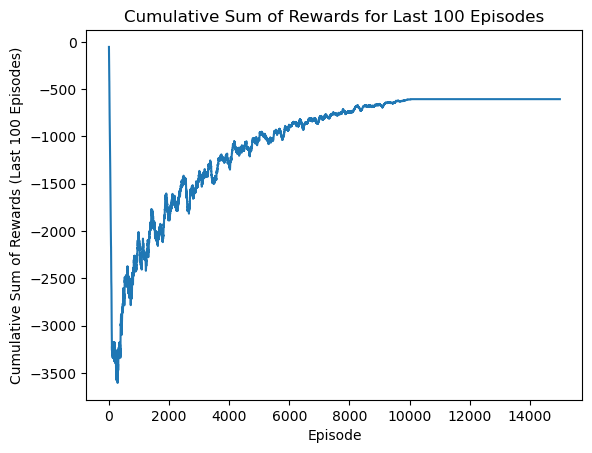

In [26]:
episodes = len(cumulative_rewards)
sum_rewards = np.zeros(episodes)

# Calculate the cumulative sum of rewards for the last 100 episodes
for t in range(episodes):
    sum_rewards[t] = np.sum(cumulative_rewards[max(0, t-100):(t+1)])

# Plot the cumulative sum of rewards for the last 100 episodes
plt.plot(sum_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Sum of Rewards (Last 100 Episodes)')
plt.title('Cumulative Sum of Rewards for Last 100 Episodes')
plt.show()

In [20]:
set(cumulative_rewards)

{-139,
 -137,
 -130,
 -119,
 -115,
 -114,
 -113,
 -112,
 -107,
 -104,
 -103,
 -100,
 -99,
 -96,
 -94,
 -93,
 -92,
 -89,
 -87,
 -85,
 -84,
 -83,
 -82,
 -81,
 -80,
 -79,
 -78,
 -77,
 -76,
 -75,
 -74,
 -73,
 -72,
 -71,
 -70,
 -69,
 -68,
 -67,
 -66,
 -65,
 -64,
 -63,
 -62,
 -61,
 -60,
 -59,
 -58,
 -57,
 -56,
 -55,
 -54,
 -53,
 -52,
 -51,
 -50,
 -49,
 -48,
 -47,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -40,
 -39,
 -38,
 -37,
 -36,
 -35,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2}